In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [8]:
data = 'data/healthcare-dataset-stroke-data.csv'

In [9]:
df = pd.read_csv(data)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,NaN,never_smoked,0
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
ratio_null = df.bmi.isnull().sum() / len(df)
ratio_null

np.float64(0.03933463796477495)

In [14]:
df = df[df['bmi'].notna()].drop('id', axis=1) #remove rows where bmi is NaN

In [15]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
5,male,81.0,0,0,yes,private,urban,186.21,29.0,formerly_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,female,13.0,0,0,no,children,rural,103.08,18.6,unknown,0
5106,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
5107,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0
5108,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


In [16]:
len(df)

4909

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='age', ylabel='Count'>

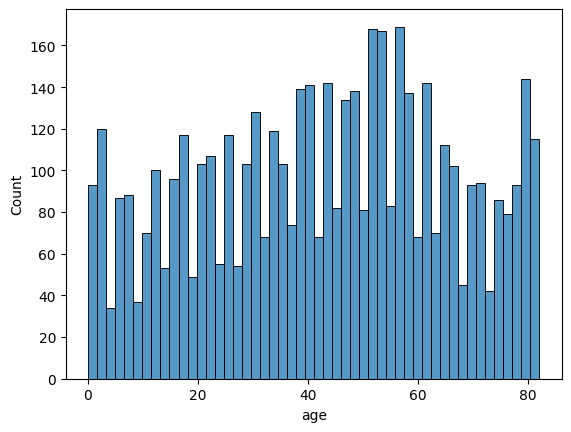

In [18]:
sns.histplot(df.age, bins=50)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

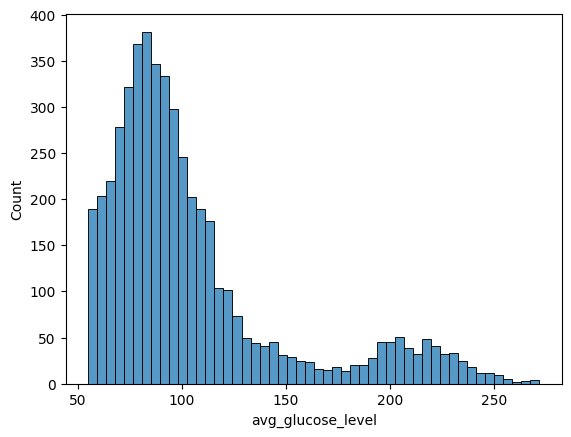

In [19]:
sns.histplot(df.avg_glucose_level, bins=50)

<Axes: xlabel='bmi', ylabel='Count'>

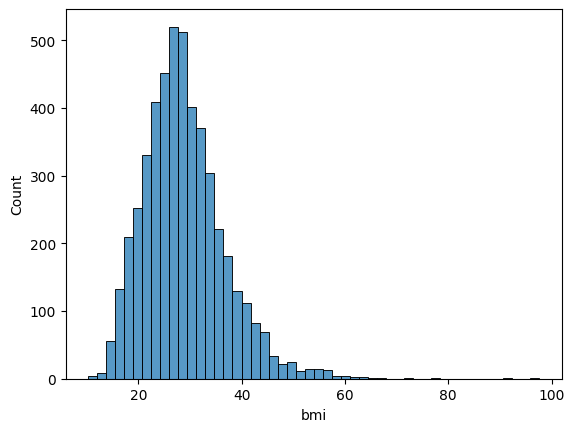

In [20]:
sns.histplot(df.bmi, bins=50)

In [21]:
df.stroke.value_counts(normalize=True) #big class imbalance

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64

In [22]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [23]:
numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [24]:
categorical = ['gender',
              'ever_married',
              'work_type',
              'residence_type',
              'smoking_status']

In [25]:
df[categorical].nunique()

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [41]:
len(df)

4909

In [31]:
from sklearn.utils import resample

# Separate the dataset into two groups: stroke = 1 and stroke = 0
df_stroke_1 = df[df['stroke'] == 1]
df_stroke_0 = df[df['stroke'] == 0]

In [33]:
# Set the size of the groups based on the desired ratio
n_stroke_1 = len(df_stroke_1)
n_stroke_0 = 1250  # Desired size for approx. 16% of stroke = 1 in the new dataset

In [34]:
# Downsample the stroke = 0 group to balance the dataset
df_stroke_0_resampled = resample(
    df_stroke_0,
    replace=False,  # Without replacement
    n_samples=n_stroke_0,
    random_state=42  # For reproducibility
)

In [35]:
# Combine the two subsets to create the new balanced dataset
df_resampled = pd.concat([df_stroke_1, df_stroke_0_resampled])

In [36]:
# Reset the index to avoid conflicts
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [37]:
# Check the proportions
print("Proportions after resampling:")
print(df_resampled['stroke'].value_counts(normalize=True))

Proportions after resampling:
stroke
0    0.856751
1    0.143249
Name: proportion, dtype: float64


In [39]:
# Split the resampled dataset into train and test sets
df_full_train, df_test = train_test_split(df_resampled, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [40]:
len(df_train), len(df_val), len(df_test)

(875, 292, 292)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [44]:
df_full_train[numerical].corrwith(df_full_train.stroke)

age                  0.398410
hypertension         0.220959
heart_disease        0.226037
avg_glucose_level    0.233624
bmi                  0.088529
dtype: float64

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
mutual_info_score(df_full_train.stroke, df_full_train.age)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


np.float64(0.12805852011330188)

In [47]:
mutual_info_score(df_full_train.stroke, df_full_train.hypertension)

np.float64(0.019469972535403307)

In [48]:
mutual_info_score(df_full_train.stroke, df_full_train.heart_disease)

np.float64(0.018559395347854904)

In [49]:
mutual_info_score(df_full_train.stroke, df_full_train.avg_glucose_level)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


np.float64(0.3984980821527289)

In [50]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.stroke)

In [51]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

work_type         0.019799
ever_married      0.015407
smoking_status    0.014101
residence_type    0.000171
gender            0.000117
dtype: float64